# Klasyfikacja w Python
***

## Wstęp

Algorytmy klasyfikacyjne, w przeciwieństwie do klasteryzacji, należą do modeli uczenia maszynowego z nadzorem (ang. *supervised learning*), to znaczy, że w zbiorze uczącym mamy określoną zmienną celu (target) oraz zdefiniowane zmienne objaśniające. Przykładem klasyfikacji może być wykrywanie spamu w poczcie, czy też rozpoznawanie obiektów na obrazie. Algorytmów klasyfikacyjnych możemy też użyć do wykrywania anomalii np. przy pomocy algorytmu KNN.

Rozdzielamy klasyfikację binarną oraz wielowymiarowa, gdzie w przypadku klasyfikacji binarnej mamy zmienną objaśnianą z dwiema możliwymi wartościami (np. pacjent zdrowy lub chory). Dla wariantu klasyfikacji wielomianowej zmienna objaśniana może mieć wiele różnych wartości (np. klasyfikując owoce rozróżniamy jabłka, gruszki i pomarańcze). Klasyfikacja jest procesem przypisywania wcześniej zdefiniowanych klas, opierając się na ich atrybutach.

Do wyjaśnialności modeli klasyfikujących używamy głównie macierzy pomyłek (ang. *confusion matrix*), na której podstawie możemy policzyć takie metryki jak *accuracy*, *precision* czy też *sensitivity*.
Poniżej przedstawiono pięć algorytmów klasyfikacyjnych, ich działanie oraz w jakich przypadkach są one użyteczne.

## Macierz pomyłek

Pojęcie macierzy pomyłek, wraz z metrykami, które się na niej opierają, zostało przedstawione w rozdziale wyjaśnialności modeli ([Macierz pomyłek](https://kikonpl.github.io/studia_PG/8.%20Wyjasnialnosc/8_Tutorial%20metryki%20statystyczne.html#podejscie-klasyfikacyjne)). Z tego względu w tym rozdziale ograniczono się wyłącznie do jej stosowania, bez dokładnego wytłumaczenia tego pojęcia.




***
## Biblioteki

Wczytujemy potrzebne biblioteki.

In [1]:
# Manipulacja danych i operacje statystyczne
import numpy as np
import pandas as pd

# Przykladowe ramki danych
from sklearn.datasets import make_classification

# Wizualizacja danych
import seaborn as sns
from matplotlib import pyplot as plt

# Podział na zbiór uczący i testowy
from sklearn.model_selection import train_test_split

# liczenie metryk oceniających model
from sklearn import metrics

# Klasyfikacja algorytmem k najbliższych sąsiadów
from sklearn.neighbors import KNeighborsClassifier

# Klasyfikacja regresją logistyczną
from sklearn.linear_model import LogisticRegression

# Klasyfikacja drzewami decyzyjnymi
from sklearn.tree import DecisionTreeClassifier

# Klasyfikacja lasami losowymi
from sklearn.ensemble import RandomForestClassifier

# Klasyfikacja przy pomocy algorytmu support vector machines
from sklearn.svm import SVC

# Metryki oceniające model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_confusion_matrix

***
## Przygotowanie danych

W celu zaprezentowania działania algorytmów klasyfikujących, wygenerujemy przykładowy zbiór danych, zawierający 2 zmienne liczbowe oraz 1 zmienną binarną, która w tym przypadku będzie oznaczała daną klasę.

### Losowe dane

'Ilość poszczególnych wartości zmiennej y'

0    1397
1     603
Name: y, dtype: int64

------------------------------
Typ obiektu: <class 'numpy.ndarray'>
Typ danych: float64
Wymiar obiektu array: (2000, 2)
------------------------------


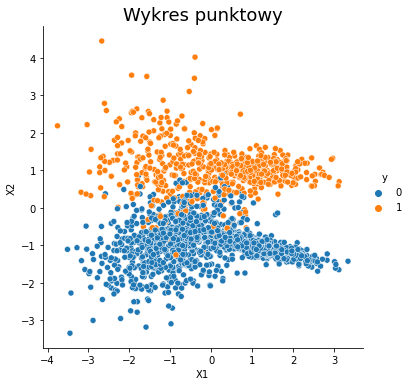

In [2]:
# Stworzenie losowego obiektu np.array
X, y = make_classification(n_samples=2000,         # ilość danych
                           n_features=2,           # liczba zmiennych objaśniających
                           n_informative=2,        # liczba 'użytecznych' zmiennych
                           n_redundant =0,         # liczba zmiennych 'nieużytecznych'
                           n_classes=2,            # liczba klas
                           weights = [0.7, 0.3],   # zbalansowanie danych
                           random_state=123)

dataset = pd.DataFrame(X)
dataset.columns = ['X1', 'X2']
dataset['y'] = y

# Sprawdzenie czy dane na pewno są zbalansowane
display("Ilość poszczególnych wartości zmiennej y",(dataset['y'].value_counts()))
print("-"*30)

print(f'Typ obiektu: {type(X)}')
print(f'Typ danych: {X.dtype}')
print(f'Wymiar obiektu array: {X.shape}')
print("-"*30)

# Wizualizacja powyższego zbioru danych z wyróżnieniem zmiennej y
sns.relplot(x="X1", y="X2", data=dataset,  hue="y")
plt.title('Wykres punktowy', fontsize=18);

Za pomocą powyższego kodu otrzymaliśmy niezbalansowany zbiór danych, posiadający 2 klasy. 1397 punktów należy do klasy 0, a 603 do klasy 1.
W celu zaprezentowania metod działania algorytmów klasyfikacyjnych, zbiór ten zostanie podzielony na zbiór uczący i testowy w proporcjach odpowiednio 8:2.

In [3]:
# Dzielimy nasze dane na zbiory uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Bibliografia

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

https://proclusacademy.com/blog/sklearn_make_classification/

***
## Modele klasyfikacyjne

W poniższym notatniku, wykorzystanych zostanie 5 algorytmów klasyfikujących, a będą to:

- K-Nearest Neighbors (Metoda K Najbliższych Sąsiadów)
- Logistic Regression (Regresja Logistyczna)
- Decision Trees (Drzewa Decyzyjne)
- Random Forests (Lasy Losowe)
- Support Vector Machines (Maszyna Wektorów Nosnych)

***
## K-Nearest Neighbors

Algorytm K-najbliższych sąsiadów opiera się na sprawdzaniu odległości pomiędzy pewnymi testowymi przykładami, a wartościami ze zbioru uczącego. Wybór liczby k, definiuje ilość najbliższych sąsiadów ze zbioru uczącego. Uśredniając wartości zmiennej objaśnianej dla wybranych obserwacji, otrzymujemy prognozę. Określenie "najbliższy" nie zawsze musi być jednoznaczne, w algorytmie istnieje możliwość stosowania różnych metryk liczących odległości (np. metryka euklidesowa, czy też taksówkowa).
Algorytm ten najlepiej stosować, gdy zmienne objaśniające i objaśniane nie posiadają prostych zależności między sobą (np. zależność ta nie jest liniowa).  

Na poniżczym przykładzie, punkt testowy, oznaczony kolorem zielonym, zostanie zaklasyfikowany jako czerwony, gdy za k przyjmiemy 3 oraz jako niebieski, gdy za k weźmiemy 5.

![Przykład](KNN.png)

<a href="https://pl.wikipedia.org/wiki/K_najbli%C5%BCszych_s%C4%85siad%C3%B3w#/media/Plik:KnnClassification.svg" target="_blank">źródło</a>

**Podstawowe metryki**

**Metryka euklidesowa**

Metrykę euklidesową w przestrzeni $\mathbb{R}^n$ definiuje się wzorem
$$d_e(x,y)=\sqrt{(y_1-x_1)^2+...+(y_n-x_n)^2}$$
**Metryka taksówkowa (manhattan)**

Metrykę taksówkową w przestrzeni $\mathbb{R}^n$ definiujemy za pomocą poniższego wzoru
$$d_m(x,y)=\sum\limits^{n}_{k=1}|x_k-y_k|$$

**Kroki działania algorytmu**

Zakładamy, że mamy podział na zbiór uczący i testowy, wtedy algorytm prezentuję się następująco
1. Wybór wartośći *k*
2. Kalkulacja macierzy odległości pomiędzy obserwacjami
3. Określenie predykcji *y* na podstawie k-najbliższych sąsiadów
4. Kalkulacja skuteczności

Weźmy pod uwagę przykładowe zbiory $X_{\textrm{ucz}} = [x_1=(1,3,4),\;x_2=(2,3,1),\;x_3=(3,2,3),\;x_4=(5,1,3)]$, $Y_{\textrm{ucz}}=[y_1=1,y_2=0,y_3=0,y_4=1]$ oraz za wartość k przyjmijmy k=3.
Za metrykę określającą odległości pomiędzy zmiennymi wybierzemy metrykę euklidesową.
Naszą nową wartością do zaklasyfikowania będzie $x_5=(2,2,2)$
wtedy macierz odległości będzie wyglądała następująco.

$d_e(x_1,x_5)=\sqrt{(1-2)^2+(3-2)^2+(4-2)^2}=\sqrt{6}$

$d_e(x_2,x_5)=\sqrt{(2-2)^2+(3-2)^2+(1-2)^2}=\sqrt{2}$

$d_e(x_3,x_5)=\sqrt{(3-2)^2+(2-2)^2+(3-2)^2}=\sqrt{2}$

$d_e(x_4,x_5)=\sqrt{(5-2)^2+(1-2)^2+(3-2)^2}=\sqrt{11}$


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">d</th>
    <th class="tg-0pky">x5</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">x1</td>
    <td class="tg-0pky">&#8730 6</td>
  </tr>
  <tr>
    <td class="tg-0pky">x2</td>
    <td class="tg-0pky">&#8730 2</td>
  </tr>
  <tr>
    <td class="tg-0pky">x3</td>
    <td class="tg-0pky">&#8730 2</td>
  </tr>
  <tr>
    <td class="tg-0pky">x4</td>
    <td class="tg-0pky">&#8730 11</td>
  </tr>
</tbody>
</table>

Ponieważ k=3, to sprawdzamy do jakich klas należą trzej najbliżsi sąsiędzi, są to $x_1,\;x_2,\;x_3$ o klasach odpowiednio $1,\;0,\;0$, zatem obserwacji $x_5$ zostanie przypisana klasa 0.

### Przykład

W celu lepszego zrozumienia algorytmu posłużymy się poniższym przykładem. Użyjemy danych wygenerowanych wcześniej do zbioru X i y, które następne zostały podzielone na zbiory treningowy i testowy. Przedstawiono 3 warianty algorytmu, dla różnej liczby sąsiadów. Patrząc na wykresy widać, że w tym przypadku większa liczba sąsiadów daje lepsze rezultaty. Jednak w celu potwierdzenia tej hipotezy najlepiej sprawdzić metryki określające wiarygodność tego modelu i wtedy wyznaczyć najoptymalniejszą liczbę sąsiadów. 

k= 3


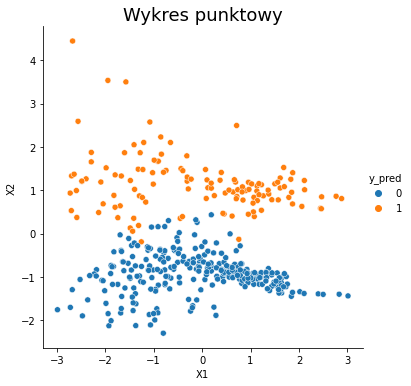

Accuracy: 0.955
Precision: 0.913
Recall: 0.943
F1: 0.927


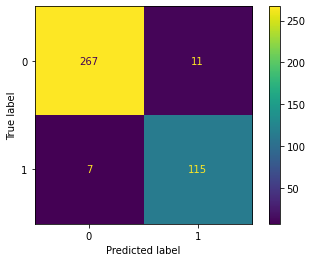

------------------------------------------------------------
k= 5


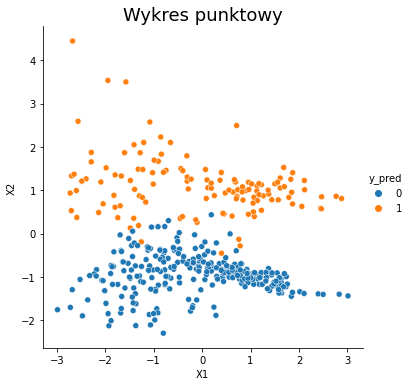

Accuracy: 0.948
Precision: 0.891
Recall: 0.943
F1: 0.916


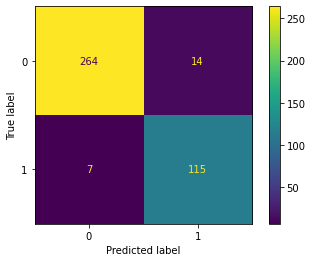

------------------------------------------------------------
k= 21


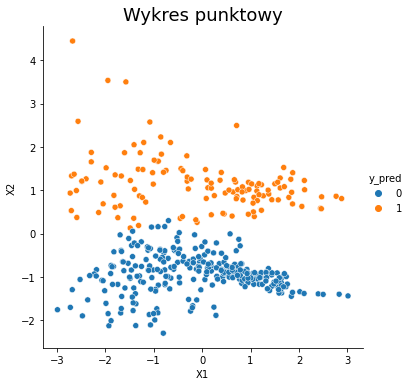

Accuracy: 0.95
Precision: 0.905
Recall: 0.934
F1: 0.919


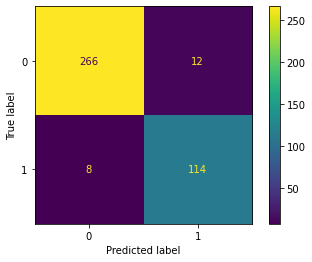

------------------------------------------------------------


In [4]:
K = [3, 5, 21]

for k in K:
    # Definiujemy model klasyfikujący, bazujący na algorytmie k najbliższych sąsiadów.  
    KNN_clf = KNeighborsClassifier(n_neighbors = k)  # liczba sąsiadów

    # Uczymy powyższy model na naszych danych
    KNN_clf.fit(X_train, y_train)

    # Stosujemy powyższy model na danych testowych
    y_pred = KNN_clf.predict(X_test)
      
    print("k=",k)
    # Wizualizacja działania algorytmu
    dataset = pd.DataFrame(X_test)
    dataset.columns = ['X1', 'X2']
    dataset['y_pred'] = y_pred
    sns.relplot(x="X1", y="X2", data=dataset,  hue="y_pred")
    plt.title('Wykres punktowy', fontsize=18)
    plt.show()
    
    # Tworzymy macierz pomyłek dla ostatnio stworzonego modelu
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred).round(3)))
    print("Precision: {}".format(precision_score(y_test, y_pred).round(3)))
    print("Recall: {}".format(recall_score(y_test,y_pred).round(3)))
    print("F1: {}".format(f1_score(y_test,y_pred).round(3)))
    plot_confusion_matrix(KNN_clf, X_test, y_test)  
    plt.show();
    
    print("-"*60)

W celu wyznaczenia najoptymalniejszej wartośći k możemy sprawdzić jak zmienia się wartość metryki F1 w zależności od tej liczby. Jest to metryka, która jest dokładniejszą metryką, niż Accuracy pozwalająca zachować odpowiednia równowagę pomiędzy Recall, a Precision.  

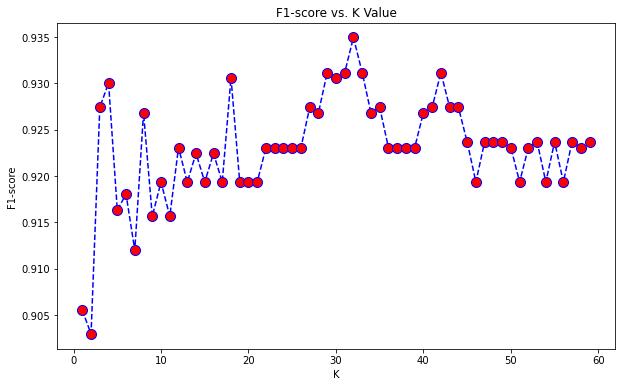

In [5]:
error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(f1_score(pred_i,y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('F1-score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-score');

Z powyższego wykresu widzimy, że najstabilniejszy wzrost F1-score zachodzi od k=20 do k=32, gdzie dla k=32 osiągamy maksimum, dlatego tę wartość możemy uznać za najlepszą. 

Accuracy: 0.96
Precision: 0.927
Recall: 0.943
F1: 0.935


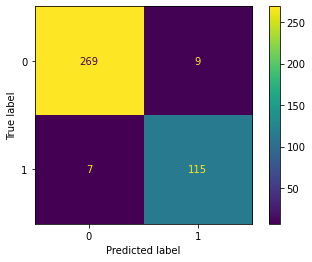

In [6]:
KNN_clf = KNeighborsClassifier(n_neighbors=32)
KNN_clf.fit(X_train,y_train)
pred = KNN_clf.predict(X_test)

# Tworzymy macierz pomyłek dla ostatnio stworzonego modelu
print("Accuracy: {}".format(accuracy_score(y_test, pred).round(3)))
print("Precision: {}".format(precision_score(y_test, pred).round(3)))
print("Recall: {}".format(recall_score(y_test,pred).round(3)))
print("F1: {}".format(f1_score(y_test,pred).round(3)))
plot_confusion_matrix(KNN_clf, X_test, y_test)  
plt.show();

## Bibliografia K-Nearest Neighbors

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/neighbors.html#classification

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

***
## Logistic Regression

Jest to jeden z najważniejszych modeli z rodziny uogólnionych modeli liniowych (GLM). Regresji logistycznej używamy, gdy chcemy przewidzieć zmienną binarną. Niezależne zmienne podlegają analizie, na podstawie której określany jest rezultat działania algorytmu. Jest to algorytm liniowy, który na podstawie prawdopodobieństwa przypisuje predykcji jedną z dwóch wartości zmiennej objaśnianej. Stanowi ona dobry pierwszy wybór przy klasyfikacji binarnej. Warto wiedzieć, że regresja logistyczna jest dobrze skalibrowana, tzn. odtwarza prawdopodobieństwa marginalne danych. Nie nadaje się ona w przypadku, gdy mamy dużo zmiennych lub zmienne kategoryczne mają bardzo dużą liczbę poziomów. 

Modele liniowe możemy opisać za pomocą wzoru $\hat{y}(w,x)=w_0+w_1x_1+...+w_px_p$, gdzie wektor $w=(w_1,...,w_p)$ oznacza wektor współczynników, $w_0$ to wyraz wolny (ang. *intercept*), a $\hat{y}$ oznacza predykcje modelu. 

Regresja logistyczna opiera się na pojęciu szansy (ang. *odds*). Wyraża się ją za pomocą wzoru $$Odds = \frac{p}{1-p}$$

Szansa, w porównanu do prawdopodobieństwa, przyjmuje dla $0<p<1$ wartości z przedziału $(0,+\infty)$, a jej logarytm wartości z zakresu $(-\infty,+\infty)$. Funkcja przekształcająca prawdopodobieństwo na logarytm szansy zwana jest *logitem* i przyjmuje postać:
$$\textrm{logit}(p)=\textrm{ln}\frac{p}{1-p}$$

Wtedy logit nieznanego prawdopodobieństwa sukcesu $p_{i}$ jest modelowany jako liniowa funkcja $x_{i}$:
$$\textrm{ln}\frac{p}{1-p}=w_0+w_1x_1+...+w_px_p$$

![Logit](Logit.png)

<a href="https://en.wikipedia.org/wiki/File:Logit.svg" target="_blank">źródło</a>

Zakładamy, że zmienna celu $y_i$ przyjmuje wartości ze zbioru $\{0,1\}$, dla punktu $i$. Po dopasowaniu modelu, przewidujemy prawdopodobieństwa pozytywnych klas $P(y_i=1|X_i)$ jako $$\hat{p}(X_i)=\frac{1}{1+\textrm{exp}(-X_iw-w_0)}.$$

Regresja logistyczna z regularyzacją $r(w)$ minimalizuje poniższą funkcję:
$$\underset{w}{\textrm{min}}C\sum\limits^{n}_{i=1}(-y_i\textrm{log}(\hat{p}(X_i))-(1-y_i)\textrm{log}(1-\hat{p}(X_i)))+r(w)$$

Przykłady funkcji kary $r(w)$
* $l_1$) $r(w)=||w||_1$  
* $l_2$) $r(w)=\frac{1}{2}||w||^2_2=\frac{1}{2}w^Tw$

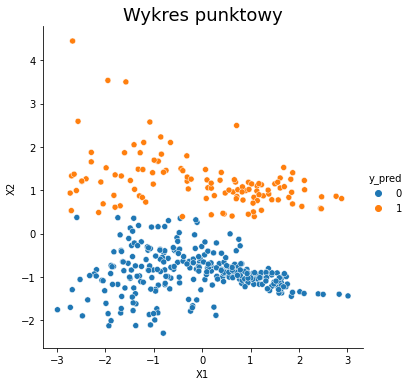

In [7]:
# Definiujemy model klasyfikujący, bazujący na regresji logistycznej.  
LR_clf = LogisticRegression(penalty = 'l2',                  # funkcja kary
                            C = 1.0,                         # odwrotność siły regularyzacji, mniejsza wartość oznacza silniejszą regularyzacje
                            fit_intercept = True,            # oznacza, czy ma być dodany bias do funkcji decyzyjnej
                            class_weight = {1:0.3, 0:0.7},   # wagi powiązane z klasami, parametr przekazywany w formie słownika
                            solver = 'liblinear',            # algorytm używany w problemie optymalizacji, 
                                                             # dla małych zbiorów dobry wyborem jest 'liblinear', natomiast 'sag' i 'saga' są szybsze dla większych zbiorów
                                                             # nie każdy wybór jest kompatybilny z funkcją kary
                            max_iter = 100,                  # maksymalna liczba iteracji
                            random_state = 123)

# Uczymy powyższy model na naszych danych
LR_clf.fit(X_train, y_train)

# Stosujemy powyższy model na danych testowych
y_pred = LR_clf.predict(X_test)

# Wizualizacja działania algorytmu
dataset = pd.DataFrame(X_test)
dataset.columns = ['X1', 'X2']
dataset['y_pred'] = y_pred
sns.relplot(x="X1", y="X2", data=dataset,  hue="y_pred")
plt.title('Wykres punktowy', fontsize=18);

W celu sprawdzenia działania powyższego algorytmu ponownie możemy posłużyć się metrykami opisanymi w osobnym rozdziale.

## Bibliografia Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

***
## Decision Trees



Drzewa decyzyjne nadają się zarówno do klasyfikacji, jak i regresji. Przyjmują one dowolne typy danych, numeryczne i kategorialne, bez założeń dotyczących rozkładu i bez potrzeby ich wstępnego przetwarzania. Algorytm ten jest względnie łatwy w użyciu, a jego wyniki są w miare prostę w interpretacji. Po dopasowaniu modelu, przewidywanie wyników jest szybkim procesem. Jednak drzewa decyzyjne mają też swoje wady, mają one tendencję do przeuczania (zwłaszcza, gdy nie są przycinane).

**Budowa drzewa decyzyjnego**

Przykład drzewa decyzyjnego. Drzewo decyzyjne składa się z węzłów i gałęzi. Konstrukcję drzewa zaczynamy od korzenia, czyli pierwszego węzła (w przykładzie poniżej jest to "Warunek 1"). Następnie tworzymy gałęzie odpowiadające różnym możliwością spełnienia pierwszego warunku. W ten sposób powstają 3 kolejne węzły ("Tak", "Warunek 2", "Nie"). Węzły, od których nie rozchodzą się już kolejne gałęzie nazywamy liścmi, w zaprezentowanym przykładzie, są to wszystkie węzły z wartościami "Tak" i "Nie".

<img src="DT.png" alt="DT" style="width: 400px;"/>

**Działanie algorytmu budującego drzewo decyzyjne**

Istnieją różne algorytmy budujące drzewa decyzyjne, są to np.
* ID3
* C4.5
* CART
* CHAID
* MARS

*Etapy działania algorytmu C4.5*

1) Wybór zbioru danych z podziałem na zmienne objaśniające i zmienną objaśnianą,

2) policzenie metryki *Information Gain*, która pomaga stwierdzić, które zmienne w zbiorze treningowym są najużyteczniejsze w rozdzielaniu klas zmiennej celu oraz *entropii*,

3) Wybranie zmiennej z najwyższym Information Gain i uznanie jej za węzeł decyzyjny w drzewie,

4) policzenie Information Gain dla pozostałych zmiennych,

5) stworzenie węzłow wychodzących od węzła decyzyjnego,

6) powtarzanie powyższych kroków, dopóki wszystkie atrybuty nie zostaną użyte,

7) przycięcie drzewa w celu zapobiegnięcia przeuczeniu.


**Przycinanie liści**

Żeby zapobiec zbyt dużemu rozrostowi drzewa decyzyjnego, który może doprowadzić do małego poziomu generalizacji oraz spowolnienia działania algorytmu, stosuje się tak zwane przycianie drzewa (ang *pruning*). Polega ono na usuwaniu zbędnych elementów z drzewa po jego utworzeniu.
Wyróżnia się dwa podstawowe rodzaje przycinania:

1) przycinanie wsteczne, polegające na wygenerowaniu drzewa, które jest bardzo dobrze dopasowane do zbioru treningowego, a następnie usuwanie od dołu najmniej efektywnych węzłów,

2) przycinanie w przód, polegające na wstrzymaniu dalszej rozbudowy danej gałęzi jeśli na węźle znajduje się ilość próbek zaklasyfikowanych do danej klasy, przekracza wyznaczony próg.

**Miary podziału drzewa**

* Entropia - miara ilości informacji.
 
$$ E = -\sum\frac{|C_i|}{|X|}log\frac{|C_i|}{|X|}$$

$C_i$ - przykłady danej klasy

X - wszystkie przykłady

* Informatio Gain - ilość pozyskanej informacji w węzłach przed ich rozdzieleniem, miara ta mówi nam jak istotna jest zmienna. Jest to oczekiwana redukcja entropii zmiennej $X$ osiągana za pomocą uczenia się stanu zmiennej losowej $Y$. Im większe Information Gain, tym tracimy na entropii.

$$I(X,Y)=E(X)-E(X|Y)=E(Y)-H(Y|X)$$

$$I=1-E$$

$E(X|Y) - $entropia warunkowa

* Indeks Giniego, miara koncentracji (nierównomierności) rozkładu zmiennej losowej.

$$gini(X)=1-\sum(\frac{|C_i|}{|X|})^2$$

przyjmje wartośći ze zbioru $[0,1]$

gini = 0 oznacza, że wszystkie obiekty należą do danej klasy

wzrost wartości współczynnika oznacza wzrost nierówności rozkładu

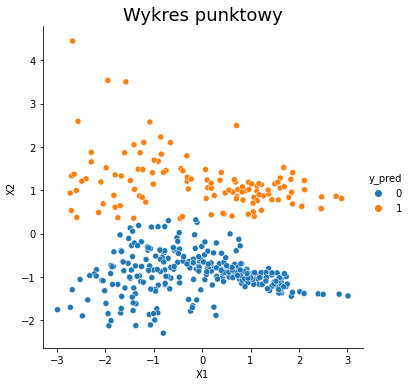

In [8]:
# Definiujemy model klasyfikujący, bazujący na drzewach decyzyjnych.  
DT_clf = DecisionTreeClassifier(max_depth = 3,              # maksymalna głebokość drzewa
                                criterion = 'gini',         # funkcja mierząca jakość rozdzielenia węzła
                                splitter = 'best',          # strategia wyboru podziału w każdym węźle, "best" dla najlepszego podziałi i "random" dla losowego
                                min_samples_split = 2,      # minimalna ilość próbek potrzebna do dokonania podziałi węzła
                                min_samples_leaf = 1,       # minimalna liczba próbek wymagana w liściu
                                max_features = None,        # maksymalna liczba rozważanych zmiennych podczas szukania najlepszego podziału węzła
                                random_state=123)

# Uczymy powyższy model na naszych danych
DT_clf.fit(X_train, y_train)

# Stosujemy powyższy model na danych testowych
y_pred = DT_clf.predict(X_test)

# Wizualizacja działania algorytmu
dataset = pd.DataFrame(X_test)
dataset.columns = ['X1', 'X2']
dataset['y_pred'] = y_pred
sns.relplot(x="X1", y="X2", data=dataset,  hue="y_pred")
plt.title('Wykres punktowy', fontsize=18);

Działanie algorytmu możemy zwizualizować w formie tekstowej, jak i graficznie.

|--- feature_1 <= 0.23
|   |--- feature_1 <= -0.23
|   |   |--- feature_1 <= -0.56
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.56
|   |   |   |--- class: 0
|   |--- feature_1 >  -0.23
|   |   |--- feature_1 <= 0.10
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.10
|   |   |   |--- class: 0
|--- feature_1 >  0.23
|   |--- feature_1 <= 0.35
|   |   |--- feature_0 <= -1.67
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -1.67
|   |   |   |--- class: 0
|   |--- feature_1 >  0.35
|   |   |--- feature_1 <= 0.68
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.68
|   |   |   |--- class: 1



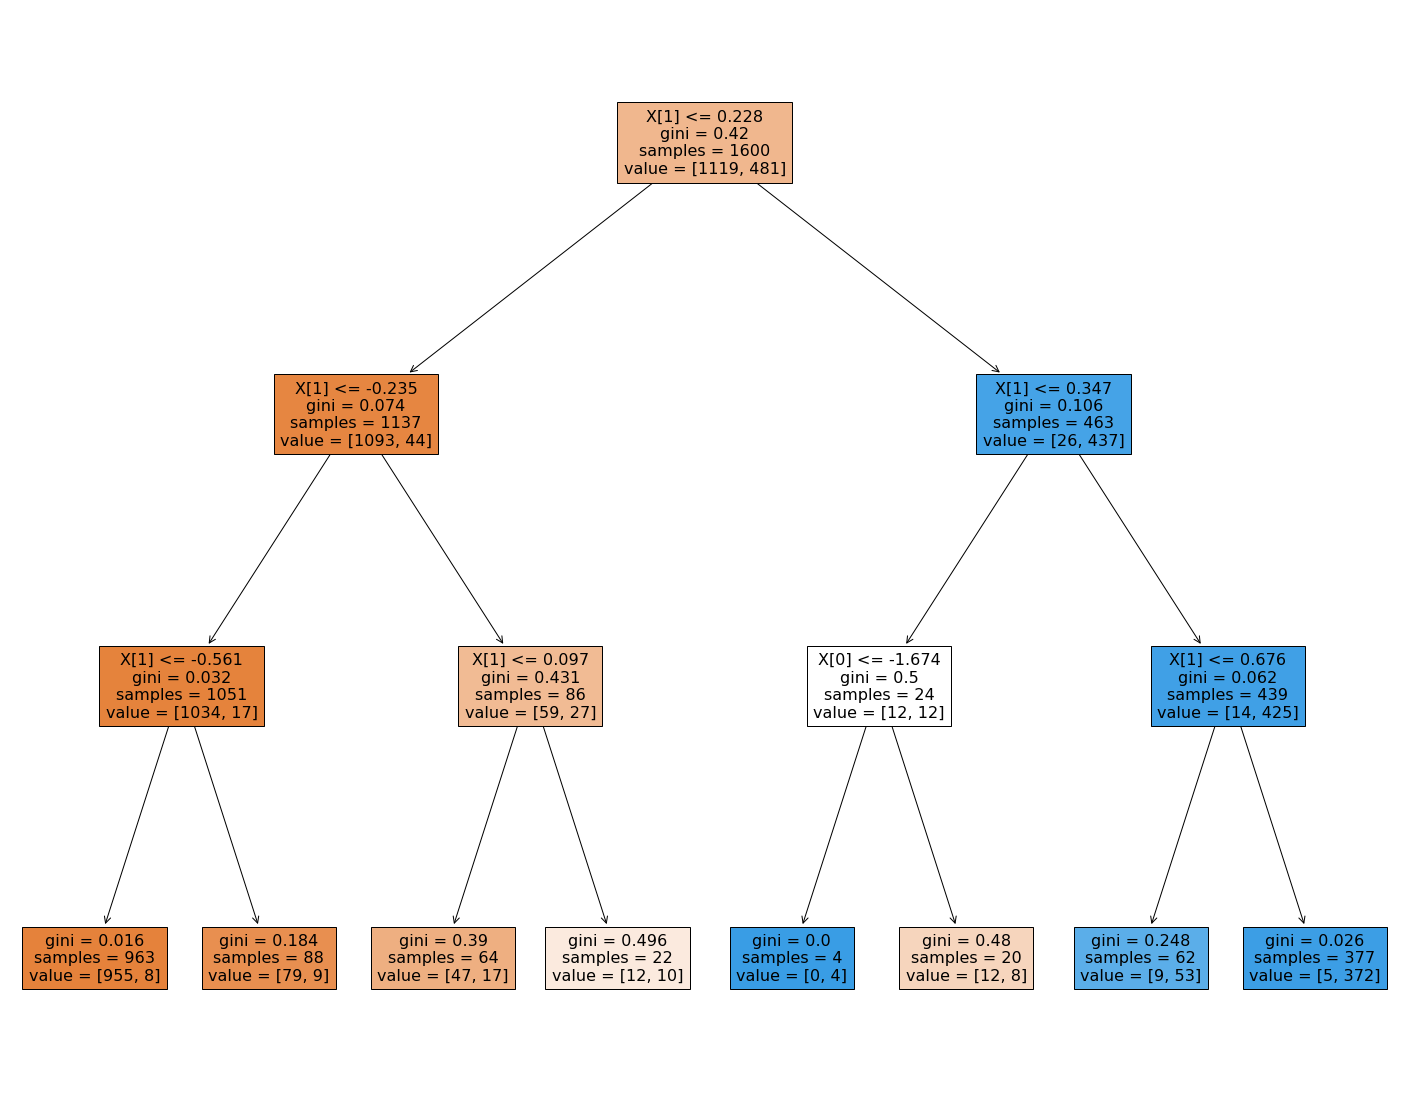

In [9]:
from sklearn import tree

print(tree.export_text(DT_clf))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_clf,         # dodanie fragmentu _= sprawia, że nie wyświetlany jest tekst nad rysunkiem drzewa decyzyjnego, który odpowiada wartościom w liściach i węzłach drzew
                   filled=True)

## Bibliografia Decision Trees

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

https://scikit-learn.org/stable/modules/tree.html#tree

https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

https://pl.wikipedia.org/wiki/Drzewo_decyzyjne

https://medium.com/analytics-vidhya/decision-trees-explained-in-simple-steps-39ee1a6b00a2

***
## Random Forests

Lasy losowe przydają sie tam gdzie mamy do czynienia z dużą liczbą cech, można je określić jako uogólnienie drzew decyzyjnych. Ich działanie polega na klasyfikacji przy pomocy grupy drzew decyzyjnych (stąd nazwa las), a ostateczny wynik jest podejmowany za pomocą głosowania na tę cechę, która częściej pojawiała się dla drzew decyzyjnych. 

Metodę działania lasów losowych można przedstawić w paru krokach:
- losowanie ze zwracaniem podzbioru danych z dostępnego zbioru treningowego 
- stworzenie drzewa decyzyjnego dla każdego podzbioru
- predykcja następuje poprzez wybranie cechy, którą częściej wskazywały wszystkie drzewa decyzyjne

Innymi słowy, gdy dla zmiennej testowej "T", kiedy las składa się z 11 drzew i 3 drzewa uznają, że zmienna ta powinna zostać oznaczona jako 0, a 8 drzew przypisze jej klasę 1, to ostatecznie zostanie ona zakwalifikowana jako 1.
Zaletą lasów losowych jest to, że są one odporne na braki danych, różne typy zmiennych czy istnienie wartości odstających. Są one odporne na przeuczenie oraz zachowują stabilność.

Ponieważ lasy losowe korzystają z drzew decyzyjnych, które powstają na podstawie różnych podzbiorów zmiennych objaśniających, w pierwszym kroku wygenerujemy nowy zbiór danych zawierający większą liczbę zmiennych. Mając teraz 6 zmiennych objaśniających, nie jesteśmy w stanie przedstawić ich na pojedynczym wykresie. Dlatego w celu zobrazowania jak wygląda nasz zbiór posłuzymy się funkcją pairplot, przedstawi nam ona zależności pomiędzy każdymi dwiema zmiennymi. 

'Ilość poszczególnych wartości zmiennej y'

0    1395
1     605
Name: y, dtype: int64

------------------------------


<Figure size 1080x1080 with 0 Axes>

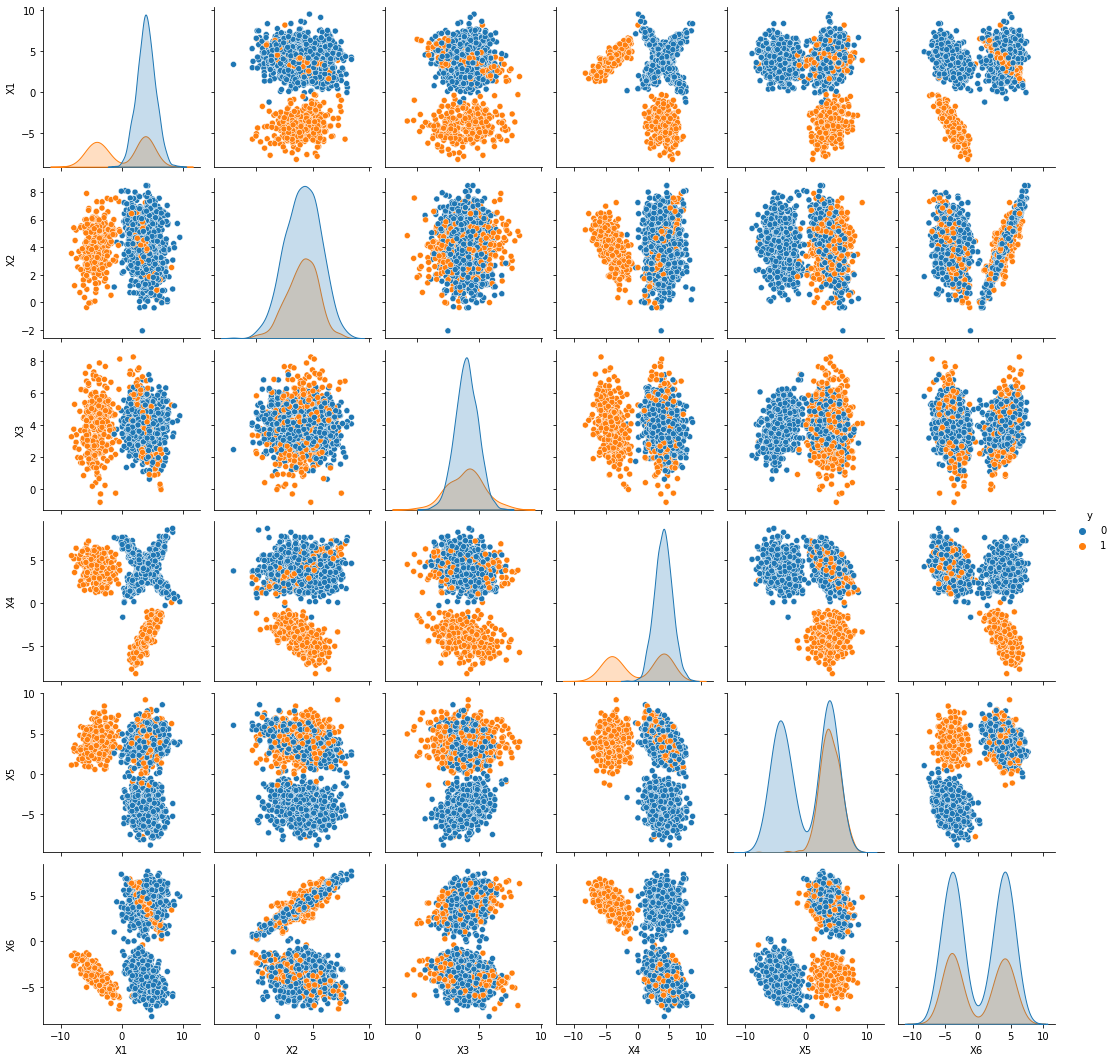

In [10]:
# Stworzenie losowego obiektu np.array
X_RF, y_RF = make_classification(n_samples=2000,  # ilość danych
                           n_features=6,    # liczba zmiennych objaśniających
                           n_informative=6, # liczba 'użytecznych' zmiennych
                           n_redundant =0,  # liczba zmiennych 'nieużytecznych'
                           n_classes=2,     # liczba klas
                           class_sep=4,     # liczba określająca jak bardzo klasy powinny być od siebie odseparowane
                           weights = [0.7, 0.3],   # zbalansowanie danych
                           random_state=123)

dataset = pd.DataFrame(X_RF)
dataset.columns = ['X1', 'X2','X3', 'X4', 'X5', 'X6']
dataset['y'] = y_RF

# Sprawdzenie czy dane na pewno są zbalansowane
display("Ilość poszczególnych wartości zmiennej y",(dataset['y'].value_counts()))
print("-"*30)

# Wizualizacja powyższego zbioru danych z wyróżnieniem zmiennej y
plt.figure(figsize=(15,15))
sns.pairplot(data=dataset,  hue="y");

Jak widać na powyższym wykresie, otrzymaliśmy niezbalansowany zbiór danych względnie podzielony na 2 klasy.

In [11]:
# Dzielimy nasze dane na zbiory uczący i testowy
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y_RF, test_size=0.2, random_state=0)

W modelu lasów losowych możemy zastosować metodę *bootstrapu*, która polega na tym, że zamiast trenować model na całym zbiorze danych, to każde drzewo w lesie losowym jest tworzone na podstawie podzbioru zbioru obserwacji. Następnie rezultaty są agregowane. Bootstrap stosuje się by zapewnić różnorodność w lasach losowych, pomaga to w zapobieganiu przeuczania się modelu oraz redukuje wariancję w predykcjach, jednak dostajemy pewien bias w każdym drzewie na skutek użycia mniejszej ilości danych do ich stworzenia.

<Figure size 1080x1080 with 0 Axes>

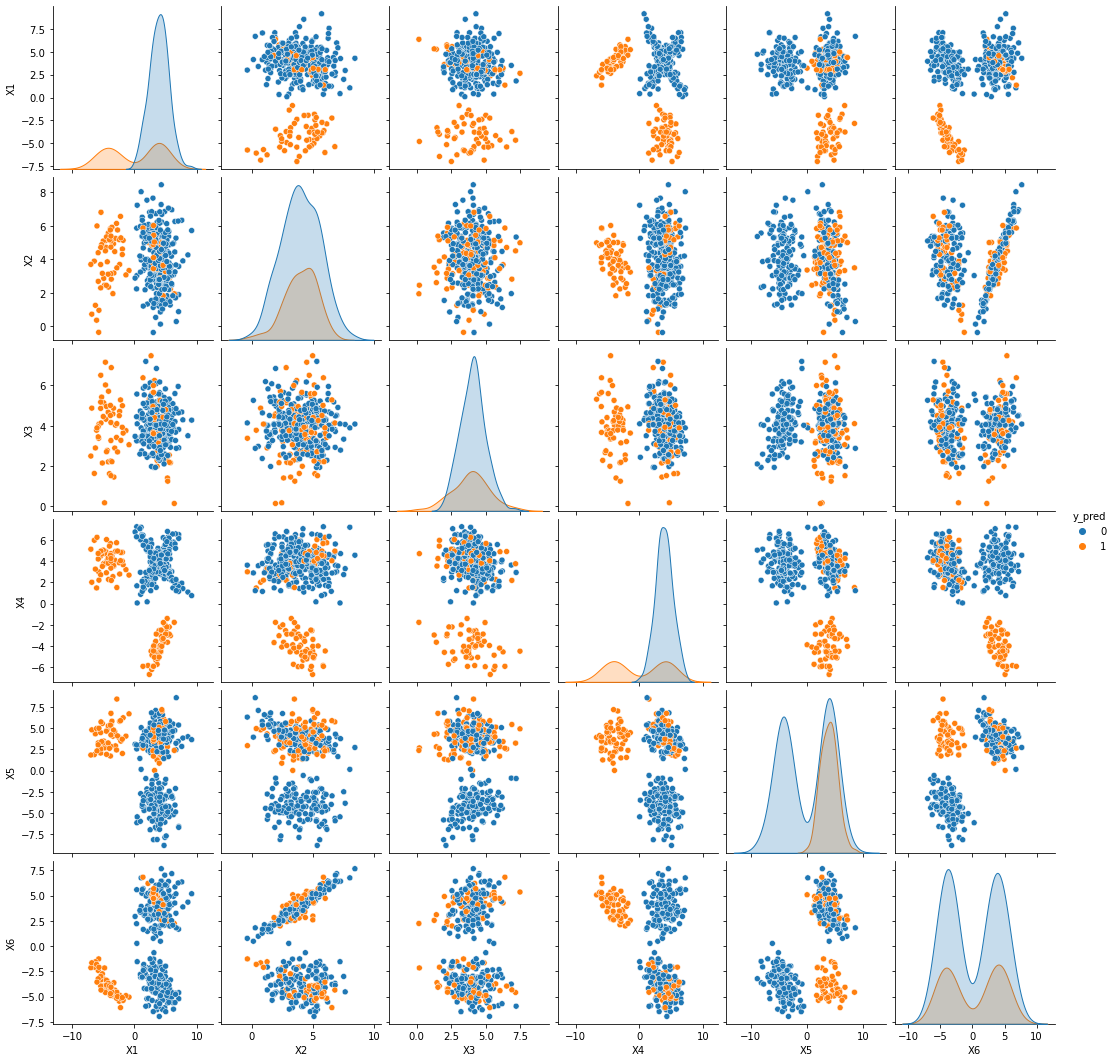

In [12]:
# Definiujemy model klasyfikujący, bazujący na lasach losowych.
RF_clf = RandomForestClassifier(n_estimators = 20,          # liczba drzew w lesie
                                criterion = 'gini',         # funkcja mierząca jakość rozdzielenia węzła
                                min_samples_split = 2,      # minimalna ilość próbek potrzebna do dokonania podziałi węzła
                                min_samples_leaf = 1,       # minimalna liczba próbek wymagana w liściu
                                max_features = None,        # maksymalna liczba rozważanych zmiennych podczas szukania najlepszego podziału węzła
                                bootstrap = True,           # określa czy próbki bootstrapowe są stosowane, gdy ustawione na False, to cały zbiór jest
                                                            # uwzględniany podczas tworzenia każdego drzewa
                                max_depth=3,                # maksymalna głębokość pojedynczego drzewa
                                random_state=0)

# Uczymy powyższy model na naszych danych
RF_clf.fit(X_RF_train, y_RF_train)

# Stosujemy powyższy model na danych testowych
y_RF_pred = RF_clf.predict(X_RF_test)

# Wizualizacja działania algorytmu
dataset = pd.DataFrame(X_RF_test)
dataset.columns = ['X1', 'X2','X3', 'X4', 'X5', 'X6']
dataset['y_pred'] = y_RF_pred
plt.figure(figsize=(15,15))
sns.pairplot(data=dataset,  hue="y_pred");

Po zastosowaniu algorytmu lasów losowych, widzimy jak zmiennę w miarę poprawnie zostały oznaczone jako dana klasa. Dodatkowo możemy też sprawdzić jak wygląda każde drzewo w lesie, poniżej zaprezentowano pierwsze z 20 drzew.

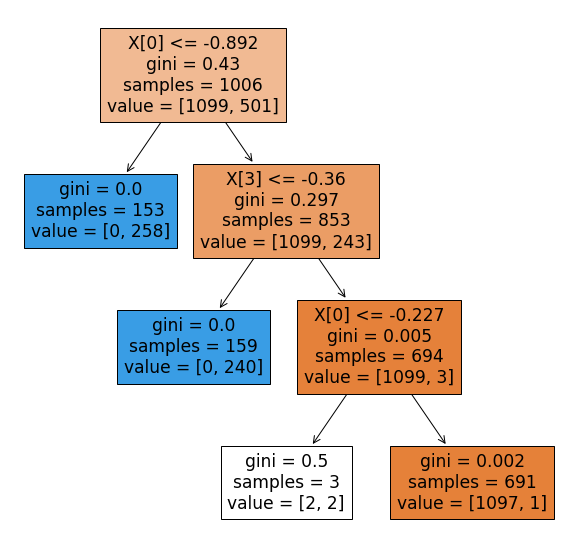

In [13]:
# Wykres pierwszego z 20 drzew w lesie losowym.
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(RF_clf.estimators_[0],
                   filled=True);

## Bibliografia Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/ensemble.html#forest

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

***
## Support Vector Machines

Pewne problemy klasyfikacji są nierozdzielne, tzn. przykłady z klasy 1 znajdują się w obszarze otoczonym przez przykłady z klasy 0, co uniemożliwia rozdzielenie obydwu klas za pomocą prostej granicy. Z tego powodu metody liniowe nie są w stanie całkowicie rozdzielić dwóch klas. 

Maszyny wektorów nośnych radzą sobie z tym problemem, jednak bez wyboru odpowiedniego jądra mogą one nie dawać najlepszych rezultatów. 

Maszyna wektorów nośnych opiera się na stworzeniu lini pomiędzy różnymi skupiskami danych, by następnie pogrupować je w klasy. Punkty po jednej stronie lini będą należeć do jednej klasy, a punkty po drugiej do innej klasy. Algorytm próbuje zmaksymalizować odległość pomiędzy linią, którą wyznacza, a punktami na jej zewnętrzu. Następnie wartości testowe klasyfikowane są przy pomocy tych lini.

Zaletami SVM jest ich skuteczność w przestrzeniach wielowymiarowych, wciąż sprawdzają się tam gdzie wymiar przestrzeni jest większy niż liczba próbek, nie zużywają dużo pamięci oraz można dopasować samodzielnie zdefiniowane jądro do algorytmu. Efekty zastosowania różnego rodzaju jądra na tym samym zbiorze danych przedstawiono na poniższym rysunku.

![Przykład](kernels.png)

<a href="https://scikit-learn.org/stable/modules/svm.html#svm-classification" target="_blank">źródło</a>

**Polynomial Kernel Function**

Jądra wielomianowe są uogólnioną reprezentacją jąder o stopniu większym niż 1. Są przydatne w przetwarzaniu obrazów.


Istnieją dwa typy jąder wielomianowych: 

1) homogeniczne jądra wielomianowe

$$ K(x_i,x_j)=(x_i\cdot x_j),$$ 

gdzie $\cdot$ oznacza iloczyn skalarny obu wektorów, a $d$ jest stopniem wielomianu.

2) niehomogeniczne jądra wielomianowe

$$K(x_i,x_j)=(x_i\cdot x_j+c)^d,$$

gdzie $c$ jest jakąś stałą.

**Gaussian Radial Basis Function (RBF) Kernel**

Jądra radialnego używa się, gdy nie mamy dużej wiedzy na temat danych. Wyraża się je za pomocą wzoru

$$K(x_i,x_j)=\textrm{exp}(-\frac{||x_i-x_j||}{2 \sigma ^2})^2,$$

gdzie $\sigma$ oznacza wariancje, a $||x_i-x_j||$ określa odległość euklidesową pomiędzy dwoma punktami.

**Linear Kernel Function**

Jest to jądro jednowymiarowe o najprostszej formie. Określa je poniższy wzór

$$K(x_i,x_j)=x_i\cdot x_j+c$$

W celu zaprezentowania metody działania algorytmu SVM, stworzymy zbiór, który będzię posiadał punkty odpowiadające jednej klasie, zagnieżdżone w zbiorze z drugiej klasy.

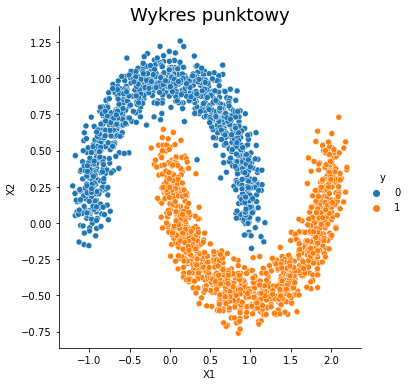

In [14]:
from sklearn.datasets import make_moons

X_svm, y_svm = make_moons(n_samples=2000,  # ilość danych
                          noise=0.1)    # poziom szumu

# Wizualizacja powyższego zbioru danych z wyróżnieniem zmiennej y
dataset = pd.DataFrame(X_svm)
dataset.columns = ['X1', 'X2']
dataset['y'] = y_svm
sns.relplot(x="X1", y="X2", data=dataset,  hue="y")
plt.title('Wykres punktowy', fontsize=18);

In [15]:
# Dzielimy nasze dane na zbiory uczący i testowy
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=0)

### Przykład z jądrem liniowym.

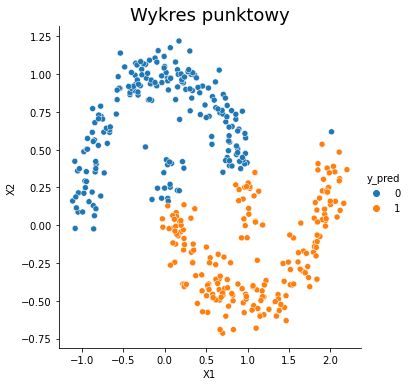

In [16]:
# Definiujemy model klasyfikujący, bazujący na algorytmie support vector machines.
SVM_clf = SVC(C = 3,               # parametr określający złożoność modelu
              kernel='linear',     # typ jądra
              random_state = 123)  

# Uczymy powyższy model na naszych danych
SVM_clf.fit(X_svm_train, y_svm_train)

# Stosujemy powyższy model na danych testowych
y_svm_pred = SVM_clf.predict(X_svm_test)

# Wizualizacja działania algorytmu
dataset = pd.DataFrame(X_svm_test)
dataset.columns = ['X1', 'X2']
dataset['y_pred'] = y_svm_pred
sns.relplot(x="X1", y="X2", data=dataset,  hue="y_pred")
plt.title('Wykres punktowy', fontsize=18);

### Przykład z jądrem radialnym.

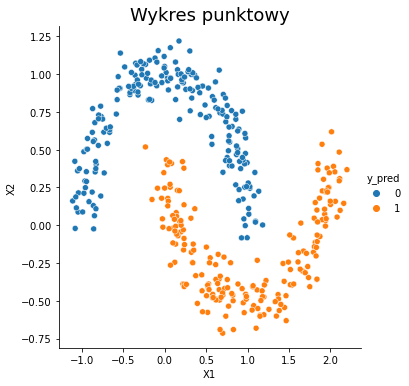

In [17]:
# Definiujemy model klasyfikujący, bazujący na algorytmie support vector machines.
SVM_clf = SVC(C = 3,               # parametr określający złożoność modelu
              kernel='rbf',        # typ jądra
              random_state = 123)  

# Uczymy powyższy model na naszych danych
SVM_clf.fit(X_svm_train, y_svm_train)

# Stosujemy powyższy model na danych testowych
y_svm_pred = SVM_clf.predict(X_svm_test)

# Wizualizacja działania algorytmu
dataset = pd.DataFrame(X_svm_test)
dataset.columns = ['X1', 'X2']
dataset['y_pred'] = y_svm_pred
sns.relplot(x="X1", y="X2", data=dataset,  hue="y_pred")
plt.title('Wykres punktowy', fontsize=18);

Na pierwszym przykładzie widać, że jądro liniowe nie do końca się sprawdza. Jednak po zastosowaniu jądra radialnego, rezultaty są o wiele lepsze. Maszyny wektorów nośnych z jądrem radialnym są bardzo dobrymi klasyfikatorami rozpoznającymi najbliższych sąsiadów. 

## Bibliografia Support Vector Machines

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

https://scikit-learn.org/stable/modules/svm.html#svm-classification

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

***
## Dodatkowe informacje

- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

- https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

- https://vitalflux.com/classification-problems-real-world-examples/